# Assessment

### Question 1

Using the taiChiData.csv dataset, study the effect of treatment after 24 weeks. 


#### Question 1.1
Plot a box-and-whisker plot to see the mean difference between 24 weeks and the baseline. Formulate a hypothesis about treatment after 24 weeks. Interpret the results obtained.


In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random as rnd

In [2]:
%matplotlib inline #plotting libary

UsageError: unrecognized arguments: #plotting libary


In [3]:
data = pd.read_csv('taiChiData.csv', sep=',') #load the data

In [4]:
data.drop_duplicates(inplace=True)  # drop duplicates
data = data.dropna(axis = 0, how = 'any')      #dropping any rows with null values

In [5]:
data.head(5)  #visualising the columns

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0


In [6]:
data['diff'] = data['FIQ_baseline'] - data['FIQ_24W'] #subtracting to get the difference between baseline and week 24

In [7]:
treatment = data.groupby(['treatment']) #sorting the different controls

In [8]:
taichi  = list(treatment)[1][1]

In [9]:
taichi['diff'].mean() #mean for taichi values

11.153846153846153

In [10]:
taichi['diff'].std() #standard deviation for taichi

2.034951016861497

In [11]:
control  = list(treatment)[0][1]

In [12]:
control['diff'].std() #standard deviation for control

3.950462485096378

In [13]:
control['diff'].mean() #mean for control values

4.384615384615385

In [14]:
taichi  #checking to see diff new column

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diff
2,3,36,1,35.5,6.7,59.56,tai chi,hypertension,83.0,68.0,68.0,15.0
8,9,32,1,38.8,14.5,36.95,tai chi,none,61.0,48.0,49.0,12.0
14,15,34,0,20.8,3.3,43.69,tai chi,none,68.0,65.0,58.0,10.0
24,25,24,1,37.3,14.6,48.87,tai chi,diabetes,85.0,69.0,74.0,11.0
25,26,14,0,22.5,16.6,56.16,tai chi,hypertension,67.0,65.0,57.0,10.0
26,27,50,0,29.4,9.7,45.45,tai chi,hypertension,62.0,50.0,51.0,11.0
29,30,46,1,32.2,15.4,57.15,tai chi,none,76.0,62.0,67.0,9.0
30,31,25,1,36.8,17.3,48.31,tai chi,hypertension,54.0,50.0,43.0,11.0
32,33,27,1,40.9,14.2,44.90,tai chi,diabetes,54.0,43.0,40.0,14.0
33,34,41,0,30.6,18.0,43.26,tai chi,none,61.0,53.0,48.0,13.0


In [15]:
control #checking to see diff new column

,Unnamed: 0,Id,sex,BMI,duration,age,treatment,coexists,FIQ_baseline,FIQ_12W,FIQ_24W,diff
0,1,22,1,45.9,13.3,56.25,control,none,57.0,52.0,50.0,7.0
1,2,11,1,28.7,9.2,47.21,control,hypertension,85.0,88.0,85.0,0.0
3,4,1,1,29.8,17.1,43.44,control,diabetes,74.0,60.0,62.0,12.0
4,5,9,1,34.0,12.2,49.99,control,heart disease,68.0,55.0,56.0,12.0
7,8,19,1,28.1,11.7,51.72,control,none,60.0,54.0,54.0,6.0
9,10,5,1,31.3,11.4,62.51,control,diabetes,63.0,59.0,61.0,2.0
10,11,4,1,36.9,10.2,57.22,control,hypertension,50.0,46.0,43.0,7.0
12,13,3,1,32.2,14.1,40.47,control,none,82.0,70.0,76.0,6.0
15,16,7,1,31.2,13.4,41.02,control,heart disease,81.0,75.0,71.0,10.0
16,17,39,0,36.9,11.8,47.57,control,diabetes,80.0,76.0,81.0,-1.0


In [16]:
samples = []
n = 40   # number of samples
j = 10  # size of each sample
for i in range(n):
    samples.append(rnd.sample(list(taichi['diff']), k=j)) # take 40 samples from the diff column, each size 10
  

In [17]:
means = [np.asarray(i).mean() for i in samples]

In [18]:
type(means)

list

In [19]:
print(len(samples), len(samples[0]))

40 10


In [20]:
samples1 = []
m = 40   # number of samples
j = 10  # size of each sample
for i in range(m):
    samples1.append(rnd.sample(list(control['diff']), k=j)) # take 40 samples from the diff column, each size 10
  

In [21]:
means1 = [np.asarray(i).mean() for i in samples1]

In [22]:
data_to_plot = [means, means1] #grouping the data to plot

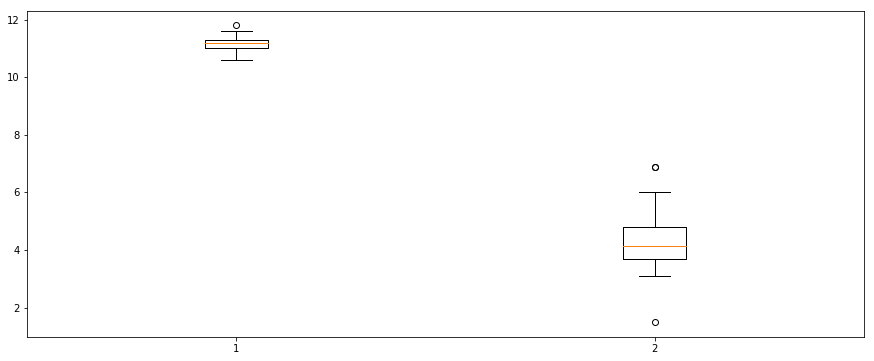

In [23]:
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)  #plot boxplot to visualize data

In [ ]:
The null hypothesis is that there is no difference betwen the control and taichi means.
The alternative hypothesis is that there is a difference between the means.
We give this hypothesis test an alpha value of 0.05

In [24]:
t,p = stats.ttest_ind(means,means1)

In [25]:
t,p #print the ttest statistics

(41.43873699472819, 7.00620261715907e-55)

#### Question 1.2
Visualize the data for baseline treatment and treatment after 24 weeks.


Text(0.5, 0, 'control baseline')

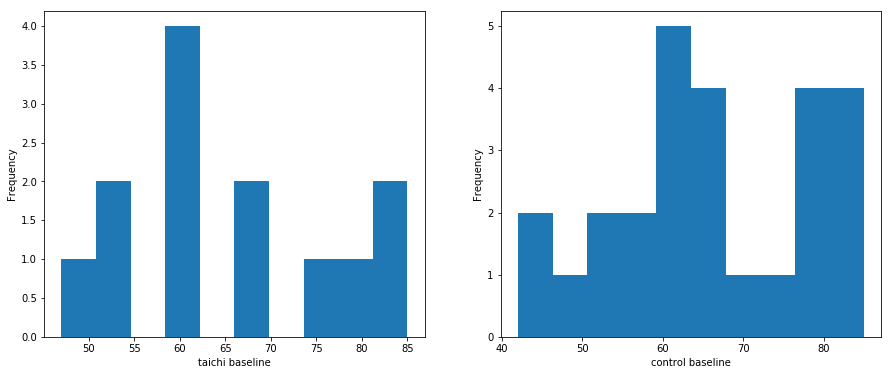

In [26]:

fig = plt.figure(figsize=(15, 6)) # figure for subplots
ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid
taichi['FIQ_baseline'].plot(kind='hist', ax=ax1)
ax1.set_xlabel('taichi baseline')
control['FIQ_baseline'].plot(kind='hist', ax=ax2)
ax2.set_xlabel('control baseline')  #histograms for the treatment baseline

In [ ]:
Taichi baseline has some intervals with no values

Text(0.5, 0, 'control 24')

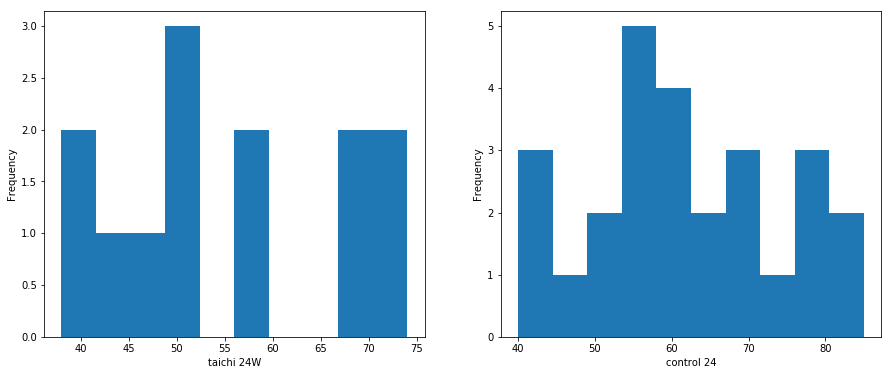

In [27]:
fig = plt.figure(figsize=(15, 6)) # figure for subplots
ax1 = plt.subplot(1,2,1)  # 1 by 2 grid, first grid
ax2 = plt.subplot(1,2,2) # 1 by 2 grid, second grid
taichi['FIQ_24W'].plot(kind='hist', ax=ax1)
ax1.set_xlabel('taichi 24W')
control['FIQ_24W'].plot(kind='hist', ax=ax2)
ax2.set_xlabel('control 24') #histograms for the treatment baseline

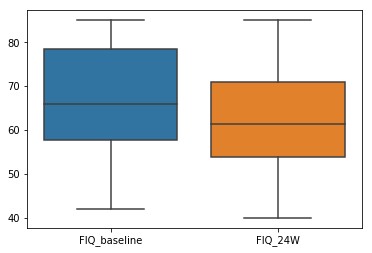

In [28]:
sns.boxplot(data=control.loc[:,['FIQ_baseline','FIQ_24W']]) #boxplot to copmare control baseline and week 24 values

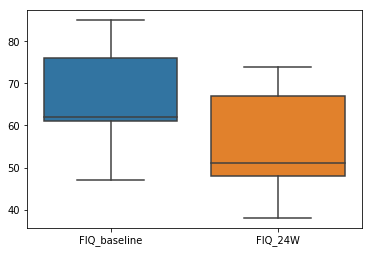

In [29]:
sns.boxplot(data=taichi.loc[:,['FIQ_baseline','FIQ_24W']]) #boxplot to copmare taichi baseline and week 24 values

#### Question 1.3
Formulate an hypothesis about pain severity before and after treatment in 24 weeks.

In [ ]:
# your answer
The null hypothesis states that there is no difference in pain severity between baseline reading and the 24W reading
The alternative hypothesis states that there is a difference in pain severity between baseline reading and the 24W reading
We set an alpha levelof 0.05 for this test

#### Question 1.4 
Discuss your results.

In [30]:
# your answer
stats.ttest_rel(taichi['FIQ_baseline'], #ttest stats for taichi
                taichi['FIQ_24W'])

Ttest_relResult(statistic=19.762521993455078, pvalue=1.6034527615814906e-10)

In [31]:
Since the p value is much less than alpha, we reject the null hypothesis

SyntaxError: invalid syntax (<ipython-input-31-fcb03ac4930a>, line 1)

In [32]:
stats.ttest_rel(control['FIQ_baseline'], #ttest stats for control
                control['FIQ_24W'])

Ttest_relResult(statistic=5.659397979375456, pvalue=6.8417665401796045e-06)

In [ ]:
Since the p value is much less than alpha, we reject the null hypothesis

### Question 2

The following is measurement data on the bonding strength of three types of resin. Are there any differences between the resin material? 
<img src='assessImg.PNG'>

Source: [Analysis of variance (ANOVA) comparing means of more than two groups](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916511/)

In [33]:
# your answers
data1 = {'First': ['19.7', '20.1', '21.3', '23.5', '9.3', '27.1', '11.6', '12.2', '15.9',
        '17.0', '17.2', '18.4', '19.8', '23.4', '28.0'],
        'Second': ['23.0', '24.5', '24.6', '27.1', '12.0', '27.8', '12.8', '16.2', '19.8',
        '22.4', '23.6', '25.3', '27.9', '34.6', '35.2'],
        'Third': ['21.6', '25.5', '25.9', '30.7', '33.0', '16.5', '22.7', '24.2', '26.2', 
        '28.4', '28.5', '30.7', '32.2', '33.8', '34.5'] }
data2 = pd.DataFrame(data1, columns = ['First', 'Second', 'Third'])
data2

,First,Second,Third
0,19.7,23.0,21.6
1,20.1,24.5,25.5
2,21.3,24.6,25.9
3,23.5,27.1,30.7
4,9.3,12.0,33.0
5,27.1,27.8,16.5
6,11.6,12.8,22.7
7,12.2,16.2,24.2
8,15.9,19.8,26.2
9,17.0,22.4,28.4


[Text(0, 0.5, '')]

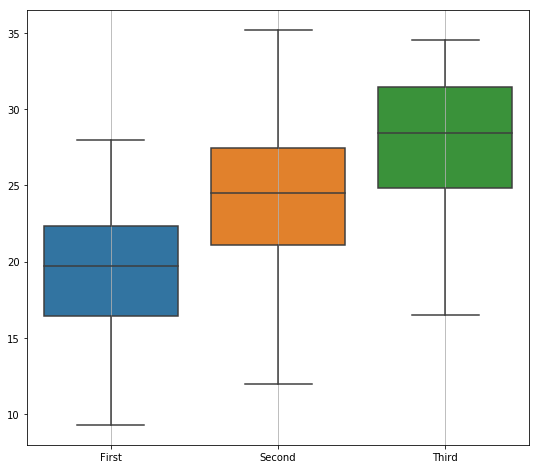

In [34]:
f, ax = plt.subplots(figsize=(9, 8))
sns.boxplot(data=data2)
ax.xaxis.grid(True) # tweak the visual presentation
ax.set(ylabel="") #boxplot for the different resins

In [ ]:
Resin A has the smallest minimum value for bonding strength follwed by Resin B and lastly C. Resin B has the
highest max value for bonding strength. Resin C has the highest mean value but its max bonding strength is less 
than that observed for Resin B.

In [35]:
 type(data2['Third'])

pandas.core.series.Series

In [39]:
print(data2['First'].std(), data2['Second'].std(), data2['Third'].std())

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [40]:
stats.f_oneway(data2['First'], data2['Second'], data2['Third'])

F_onewayResult(statistic=8.488055984887513, pvalue=0.0008017448866768368)

In [ ]:
Since the p value is much less than alpha level of 0.05, we reject the null hypothesis